In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 
policy_holder = pd.read_csv('Policy_Holder.csv',encoding = 'GBK')  # 投保人信息表
provider = pd.read_csv('Provider.csv',encoding = 'GBK')  # 医疗机构信息表
claim = pd.read_csv('Claim.csv',encoding = 'GBK')  # 索赔信息表

In [2]:
print(policy_holder.head)
print(policy_holder.shape)
print(provider.head)
print(provider.shape)
print(claim.head)
print(claim.shape)

<bound method NDFrame.head of      Policy_HolderID ProgramCode          MEDcode  Age Sex
0        69400038463       老年保障险  RegularMedicare   43   女
1        11700010743         伤残险              MCQ   90   女
2        68000037855         伤残险  RegularMedicare   68   女
3        38900023308       老年保障险  RegularMedicare   67   男
4        39000023336       老年保障险  RegularMedicare   59   男
..               ...         ...              ...  ...  ..
395      69100038371         伤残险  RegularMedicare   58   女
396      66600037239       老年保障险  RegularMedicare   44   女
397      57300032948       老年保障险  RegularMedicare   69   男
398      69300038437         伤残险  RegularMedicare   42   女
399      66800037290       老年保障险  RegularMedicare   48   女

[400 rows x 5 columns]>
(400, 5)
<bound method NDFrame.head of       ProviderID      ProviderType ProviderSpecialty  Location
0    10010210084    amb srg center    misc physician       367
1    10010410197    amb srg center    misc physician       410
2    1001

In [3]:
# 描述性统计分析，返回缺失值个数、最大值、最小值
print("policy_holder.describe:\n",policy_holder.describe())
explore_policy_holder = policy_holder.describe(percentiles=[], include='all').T
print("explore_policy_holder:\n",explore_policy_holder)
explore_provider = provider.describe(percentiles=[], include='all').T  
explore_claim = claim.describe(percentiles=[], include = 'all').T 
# percentiles参数是指定计算多少的分位数表（如1/4分位数、中位数等）
explore_policy_holder['null'] = policy_holder.isnull().sum()# 计算空缺值
explore_policy_holder = explore_policy_holder[['null', 'max', 'min']]
explore_provider['null'] = provider.isnull().sum()
explore_provider = explore_provider[['null', 'max', 'min']]
explore_claim['null'] = claim.isnull().sum()
explore_claim = explore_claim[['null', 'max', 'min']]

policy_holder.describe:
        Policy_HolderID         Age
count     4.000000e+02  400.000000
mean      3.998627e+10   51.840000
std       1.714814e+10   19.588355
min       1.030001e+10    3.000000
25%       2.535002e+10   39.000000
50%       4.000002e+10   50.000000
75%       5.495003e+10   65.000000
max       6.940004e+10   97.000000
explore_policy_holder:
                 count unique              top freq         mean          std  \
Policy_HolderID   400    NaN              NaN  NaN  3.99863e+10  1.71481e+10   
ProgramCode       400      2            老年保障险  201          NaN          NaN   
MEDcode           400      5  RegularMedicare  319          NaN          NaN   
Age               400    NaN              NaN  NaN        51.84      19.5884   
Sex               400      2                女  219          NaN          NaN   

                      min    50%       max  
Policy_HolderID  1.03e+10  4e+10  6.94e+10  
ProgramCode           NaN    NaN       NaN  
MEDcode             

In [4]:
explore_policy_holder

,null,max,min
Policy_HolderID,0,6.94e+10,1.03e+10
ProgramCode,0,NaN,NaN
MEDcode,0,NaN,NaN
Age,0,97,3
Sex,0,NaN,NaN


In [5]:
explore_provider

,null,max,min
ProviderID,0,1.00862e+10,1.00102e+10
ProviderType,0,NaN,NaN
ProviderSpecialty,0,NaN,NaN
Location,0,945,67


In [6]:
explore_claim

,null,max,min
索赔编号,0,9.9796e+14,1.00354e+14
医疗机构编号,0,1.00862e+10,1.00104e+10
投保人编号,0,6.93e+10,1.03e+10
投保人状态,0,NaN,NaN
医疗机构服务类别,0,NaN,NaN
诊断,0,NaN,NaN
处理过程代码,0,90,5
住院时长,0,67,0
住院开始时间,0,NaN,NaN
住院结束时间,0,NaN,NaN


In [7]:
#数据清洗
# 将非字符型投保人编号、医疗机构编号、索赔编号的特征转为字符型
policy_holder[['Policy_HolderID']] = policy_holder[['Policy_HolderID']].astype(str)
provider[['ProviderID']] = provider[['ProviderID']].astype(str)
claim[['索赔编号']] = claim[['索赔编号']].astype(str)
claim[['医疗机构编号']] = claim[['医疗机构编号']].astype(str)
claim[['投保人编号']] = claim[['投保人编号']].astype(str)

# 更改表的列名为中文，增强可读性
policy_holder.columns = ['投保人编号', '保险条款', '治疗措施编码', '年龄', '性别']
provider.columns = ['医疗机构编号', '医疗机构大类', '医疗机构细类', '位置编码']

# 住院开始时间、住院结束时间的特征转为时间类型转为时间类型
claim['住院开始时间'] = pd.to_datetime(claim['住院开始时间'], format = '%Y-%m-%d')
claim['住院结束时间'] = pd.to_datetime(claim['住院结束时间'], format = '%Y-%m-%d')

In [8]:
print(policy_holder.head)
print(provider.head)

<bound method NDFrame.head of            投保人编号   保险条款           治疗措施编码  年龄 性别
0    69400038463  老年保障险  RegularMedicare  43  女
1    11700010743    伤残险              MCQ  90  女
2    68000037855    伤残险  RegularMedicare  68  女
3    38900023308  老年保障险  RegularMedicare  67  男
4    39000023336  老年保障险  RegularMedicare  59  男
..           ...    ...              ...  .. ..
395  69100038371    伤残险  RegularMedicare  58  女
396  66600037239  老年保障险  RegularMedicare  44  女
397  57300032948  老年保障险  RegularMedicare  69  男
398  69300038437    伤残险  RegularMedicare  42  女
399  66800037290  老年保障险  RegularMedicare  48  女

[400 rows x 5 columns]>
<bound method NDFrame.head of           医疗机构编号            医疗机构大类          医疗机构细类  位置编码
0    10010210084    amb srg center  misc physician   367
1    10010410197    amb srg center  misc physician   410
2    10010610221    amb srg center  misc physician   104
3    10010710275  anesthesiologist      anesthesia   104
4    10010810371  anesthesiologist      anesthesia   3

老年保障险    201
伤残险      199
Name: 保险条款, dtype: int64 <class 'pandas.core.series.Series'>


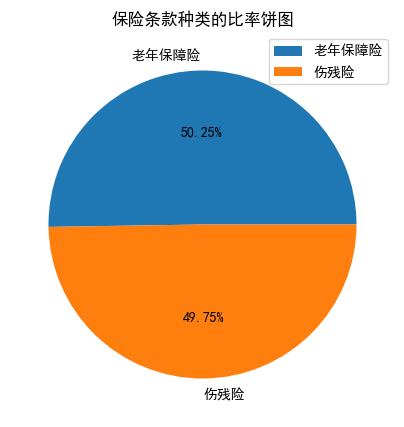

In [9]:
# 提取保险条款数据
# policy_holder.describe()
ProgramCode = pd.value_counts(policy_holder['保险条款'])
#ProgramCode为series, 行标签为保险类别，数值对应为该保险条目数
print(ProgramCode,type(ProgramCode))
plt.figure(figsize=(5, 5))  # 设置画布大小

# 通过绘制饼图查看投保人所投保险条款的比例
plt.pie(ProgramCode,
        labels=ProgramCode.index, autopct='%1.2f%%')  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('保险条款种类的比率饼图')
plt.legend()  # 图例
plt.show()

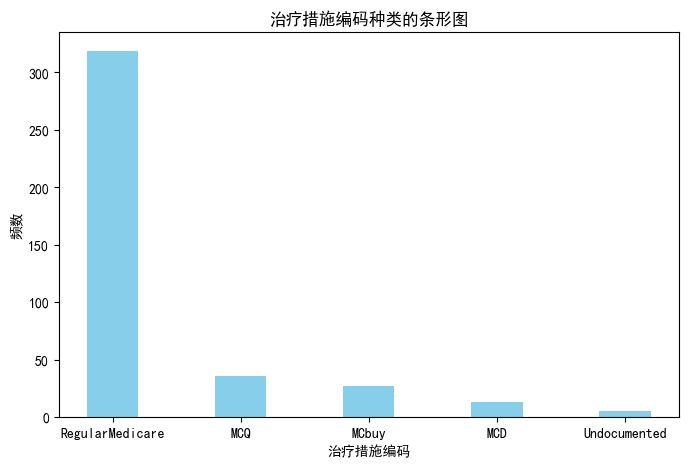

In [10]:
# 提取并统计治疗措施编码数据
MEDcode = pd.value_counts(policy_holder['治疗措施编码'])
plt.figure(figsize = (8, 5))
plt.bar(MEDcode.index, MEDcode, width = 0.4,color='skyblue')
plt.xlabel('治疗措施编码')
plt.ylabel('频数')
plt.title('治疗措施编码种类的条形图')
plt.show()
#由条形图可以看出，投保人所对应的治疗措施共有 5 种，其中编码为 RegularMedicare
# 的治疗措施所占比例最高，说明投保人所接受的治疗措施中，常规的药物治疗最为常见。其
# 他的治疗措施所占比例相对低，提供给针对相对应治疗的投保病人。

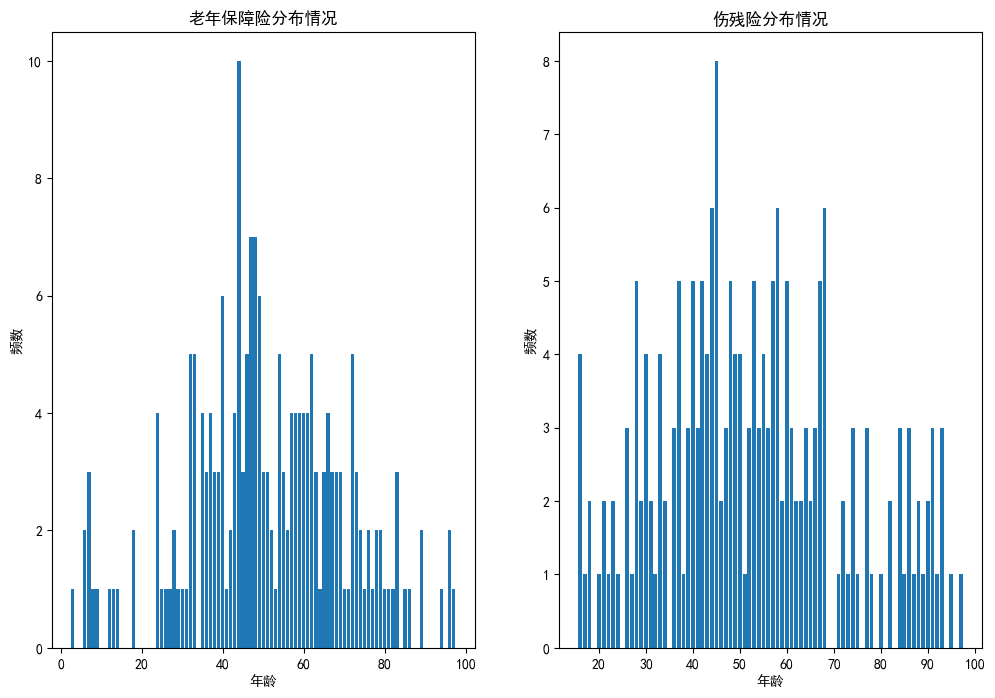

<function matplotlib.pyplot.close(fig=None)>

In [11]:
# 提取投老年保障险的投保人数据
#利用dataframe的loc方法进行标签筛选‘老年保障险’
old_distribute = policy_holder.loc[
        policy_holder['保险条款']=='老年保障险', :]
#按年龄统计样本数
old_distribute_age = pd.value_counts(old_distribute['年龄'])
plt.figure(figsize=(12, 8))
plt.subplot(121)  # 子图
plt.bar(old_distribute_age.index, old_distribute_age)
plt.title('老年保障险分布情况')
plt.xlabel('年龄')
plt.ylabel('频数')

# 提取投伤残险的投保人数据
insurance_disability = policy_holder.loc[
        policy_holder['保险条款']=='伤残险',:]
insurance_disability_age = pd.value_counts(insurance_disability['年龄'])
plt.subplot(122)  # 子图
plt.bar(insurance_disability_age.index, insurance_disability_age)
plt.title('伤残险分布情况')
plt.xlabel('年龄')
plt.ylabel('频数')
plt.show()
plt.close
# 由条形图可以看出，老年保障险和伤残险的投保人中，年龄分布有较大差异。其中伤残
# 险的投保人一般无年龄特别小者，不小于 16 岁；而老年保障险的投保人年龄则有出现比较小的情况，有小至 3 岁的投保人。
# 这个现象说明发生意外事故等伤残情况，相较之下容易发生在少年阶段及其以上的人群；
# 而老年保障险有年龄小的投保人，表明该保险较受有孩子家庭的欢迎

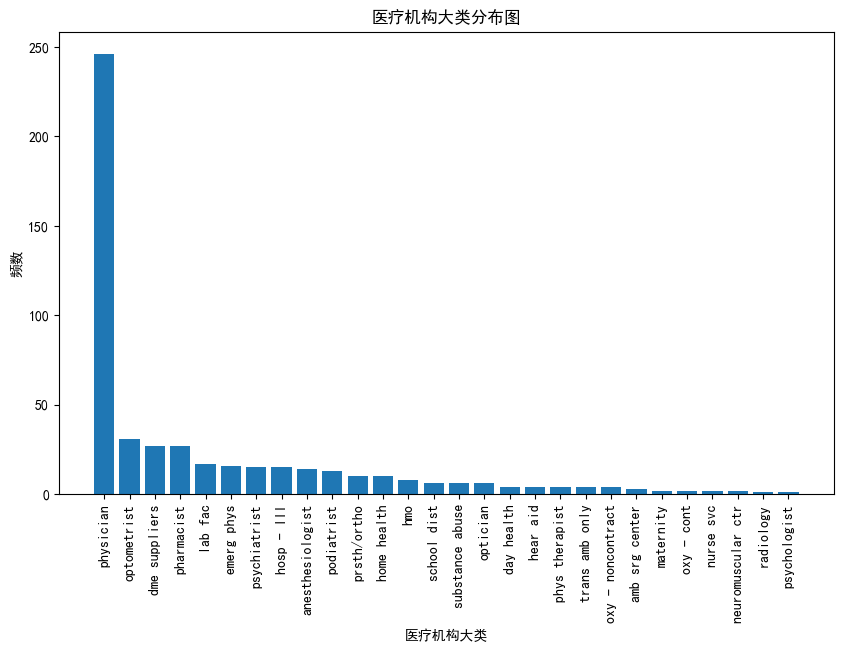

In [12]:
# 提取并统计医疗机构大类数据
provider_type = pd.value_counts(provider['医疗机构大类'])
plt.figure(figsize=(10, 6))
plt.bar(provider_type.index, provider_type)  # 绘制医疗机构大类类别分布图
plt.xticks(rotation=90)
plt.title('医疗机构大类分布图')
plt.xlabel('医疗机构大类')
plt.ylabel('频数')
plt.show()
# 从图中可以看出内科的各种疾病的出险频率更高。

In [13]:
# 根据保险行业的知识，投保人的出险模式和索赔模式在一段时间内不应该有较大变化，在上半年和下半年出险模式
# 和索赔模式变化较大的，疑似骗保。医疗机构的索赔模式在一段时间内也应该一致，在上半年和下半年变化较大的，疑似骗保。
import pandas as pd
#筛选核心属性'医疗机构编号', '投保人编号', '住院开始时间','保费覆盖额', '账单金额', '支付金额'
claim_money = claim.loc[:, ['医疗机构编号', '投保人编号', '住院开始时间',
                            '保费覆盖额', '账单金额', '支付金额']]

# 提取住院时间月份
claim_money['住院开始时间'] = claim_money['住院开始时间'].dt.month 
claim_money['住院开始时间'] = claim_money['住院开始时间'].astype(int)  #转换为int方便比较

# 按住院开始时间划分上半年和下半年数据
claim_money['所属时间段'] = 0
claim_money.loc[claim_money['住院开始时间'] <= 6, '所属时间段'] = '1H'
claim_money.loc[claim_money['住院开始时间'] > 6, '所属时间段'] = '2H'

In [14]:
claim_money.head(5)

,医疗机构编号,投保人编号,住院开始时间,保费覆盖额,账单金额,支付金额,所属时间段
0,10010410197,37900022956,3,38400,39307,37587,1H
1,10010410197,37900022956,3,26100,26826,25794,1H
2,10010610221,39000023336,1,17200,17327,17029,1H
3,10010610221,39000023336,2,24100,24702,23399,1H
4,10010710275,15000012482,6,57600,58393,56881,1H


In [15]:
#按['投保人编号','所属时间段']group by,筛选得到行索引
print(claim_money.groupby(['投保人编号','所属时间段']).groups)

{('10300010118', '1H'): [1690, 1692, 1693, 1694, 1696, 1697, 1698, 1699, 1700, 2746, 3800, 3801, 3802, 3804, 3805, 3807, 3813, 3818, 3824, 3829, 3830, 3831, 3832, 3864, 3865, 3866, 6553, 9252, 9256, 9258], ('10300010118', '2H'): [180, 1691, 1701, 2745, 3334, 3799, 3803, 3806, 3808, 3809, 3822, 3823, 3825, 3833, 3834, 3835, 3861, 3863, 4896, 6554, 6785, 7321, 9264, 9270], ('10500010200', '1H'): [2682, 2683, 3391, 3394], ('10600010291', '2H'): [2195, 5882, 5883, 5884, 5912, 5913, 5914, 6015, 6016, 6017, 6018, 6024, 6025, 6426, 6429, 7442, 7443, 7444, 7445, 7449, 7452], ('10700010301', '2H'): [679], ('10800010360', '1H'): [2620, 4515, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 7208, 7210, 7211, 7213, 7214, 7215, 7216, 7217, 7218], ('11000010424', '1H'): [362, 363, 1174, 1175, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 4847, 4848], ('11200010435', '2H'): [1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 7435, 7438, 7446, 7450, 7461, 7802], ('11600010648', '1H'): 

In [16]:
#针对['医疗机构编号']做计数
print(claim_money.groupby(['投保人编号','所属时间段'])['医疗机构编号'].count())

投保人编号        所属时间段
10300010118  1H       30
             2H       24
10500010200  1H        4
10600010291  2H       21
10700010301  2H        1
                      ..
68900038289  2H       39
69100038371  1H        8
             2H       10
69300038437  1H       22
             2H       11
Name: 医疗机构编号, Length: 433, dtype: int64


In [17]:
# 根据投保人编号统计上下半年的索赔支付笔数总数 
claim_paycount = claim_money.groupby(['投保人编号','所属时间段'])['医疗机构编号'].count()
claim_paycount = claim_paycount.reset_index()
print("after reset index:\n",claim_paycount)#原列索引【医疗机构编号】不再适用

after reset index:
            投保人编号 所属时间段  医疗机构编号
0    10300010118    1H      30
1    10300010118    2H      24
2    10500010200    1H       4
3    10600010291    2H      21
4    10700010301    2H       1
..           ...   ...     ...
428  68900038289    2H      39
429  69100038371    1H       8
430  69100038371    2H      10
431  69300038437    1H      22
432  69300038437    2H      11

[433 rows x 3 columns]


In [18]:
#重命名列索引
claim_paycount.columns = ['投保人编号', '所属时间段', '半年支付笔数'] 
claim_paycount

,投保人编号,所属时间段,半年支付笔数
0,10300010118,1H,30
1,10300010118,2H,24
2,10500010200,1H,4
3,10600010291,2H,21
4,10700010301,2H,1
...,...,...,...
428,68900038289,2H,39
429,69100038371,1H,8
430,69100038371,2H,10
431,69300038437,1H,22


In [19]:
 # 根据投保人编号统计上下半年保费覆盖额,账单金额,支付金额总额
claim_moneysum = claim_money.groupby(['投保人编号','所属时间段'])['保费覆盖额', '账单金额', '支付金额'].sum()
claim_moneysum = claim_moneysum.reset_index()
#重命名列索引
claim_moneysum.columns = ['投保人编号', '所属时间段',
                          '半年保费覆盖额','半年账单金额'
                          ,'半年支付金额'] 
#基于键['投保人编号','所属时间段']，合并claim_moneysum，claim_paycount
claim_part = pd.merge(claim_moneysum, claim_paycount,on=['投保人编号','所属时间段'])

claim_part

,投保人编号,所属时间段,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数
0,10300010118,1H,1240200,1254890,1225159,30
1,10300010118,2H,1051400,1065577,1039617,24
2,10500010200,1H,247800,250520,245811,4
3,10600010291,2H,785400,797520,776217,21
4,10700010301,2H,43800,44633,43172,1
...,...,...,...,...,...,...
428,68900038289,2H,1476900,1495658,1457407,39
429,69100038371,1H,285900,290108,279869,8
430,69100038371,2H,455600,459872,450453,10
431,69300038437,1H,782400,793572,773349,22


In [20]:
# 选取投保人信息表中的年龄（Age）、性别（Sex 取值范围为女和男）、治疗措施编码、保险条款属性的特征，
# 除了年龄之外的特征采用虚拟变量法（One-hot,独热码），即按值进行展开：
#采用虚拟变量的原因：
#一些模型、特别是线性模型容易被数值大小关系所影响，为了避免模型在类别之间引入不必要的偏好，使用虚拟变量可以确保每个类别有自己独立的二进制表示
#某些某型要求输入为数值型，而不能是分类型数据，例如：逻辑回归

policy_holder_t = policy_holder
#原表policy_holder纵向double拼接
policy_holder_t = pd.concat([policy_holder_t, policy_holder], axis = 0)
policy_holder_t['所属时间段'] = 0   #增加一列'所属时间段'
#设置index索引
policy_holder_t.index = range(len(policy_holder_t))

# 确保每个投保人有两条记录
policy_holder_t.loc[0:400, '所属时间段'] = '1H'     #前400条标识为上半年'1H'
policy_holder_t.loc[400:800, '所属时间段'] = '2H'   #后400条标识为下半年'2H'
#可以采用on='投保人编号',如果没用指定On，默认采用共同列做连接键
claim_policy = pd.merge(claim_part, policy_holder_t,  how='outer')
print("claim_part:\n",claim_part.head(5))
print("policy_holder_t:\n",policy_holder_t.head(5))
print("after merge:\n",claim_policy.head(5))

claim_part:
          投保人编号 所属时间段  半年保费覆盖额   半年账单金额   半年支付金额  半年支付笔数
0  10300010118    1H  1240200  1254890  1225159      30
1  10300010118    2H  1051400  1065577  1039617      24
2  10500010200    1H   247800   250520   245811       4
3  10600010291    2H   785400   797520   776217      21
4  10700010301    2H    43800    44633    43172       1
policy_holder_t:
          投保人编号   保险条款           治疗措施编码  年龄 性别 所属时间段
0  69400038463  老年保障险  RegularMedicare  43  女    1H
1  11700010743    伤残险              MCQ  90  女    1H
2  68000037855    伤残险  RegularMedicare  68  女    1H
3  38900023308  老年保障险  RegularMedicare  67  男    1H
4  39000023336  老年保障险  RegularMedicare  59  男    1H
after merge:
          投保人编号 所属时间段    半年保费覆盖额     半年账单金额     半年支付金额  半年支付笔数 保险条款  \
0  10300010118    1H  1240200.0  1254890.0  1225159.0    30.0  伤残险   
1  10300010118    2H  1051400.0  1065577.0  1039617.0    24.0  伤残险   
2  10500010200    1H   247800.0   250520.0   245811.0     4.0  伤残险   
3  10600010291    2H   7854

In [21]:
print(claim_policy.isnull().sum())
#以0填充空值
claim_policy = claim_policy.fillna(0)

投保人编号        0
所属时间段        0
半年保费覆盖额    367
半年账单金额     367
半年支付金额     367
半年支付笔数     367
保险条款         0
治疗措施编码       0
年龄           0
性别           0
dtype: int64


In [22]:
# 构建虚拟变量
model3_data1 = pd.concat([claim_policy.loc[:,['半年保费覆盖额', '半年账单金额', '半年支付金额','半年支付笔数','年龄']],
                          pd.get_dummies(claim_policy['性别']),
                          pd.get_dummies(claim_policy['治疗措施编码']),
                          pd.get_dummies(claim_policy['保险条款'])],axis = 1)
model3_data = model3_data1.copy()
model3_data

,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数,年龄,女,男,MCD,MCQ,MCbuy,RegularMedicare,Undocumented,伤残险,老年保障险
0,1240200.0,1254890.0,1225159.0,30.0,27,0,1,0,0,0,1,0,1,0
1,1051400.0,1065577.0,1039617.0,24.0,27,0,1,0,0,0,1,0,1,0
2,247800.0,250520.0,245811.0,4.0,49,0,1,0,0,0,1,0,1,0
3,785400.0,797520.0,776217.0,21.0,28,0,1,0,0,0,1,0,1,0
4,43800.0,44633.0,43172.0,1.0,92,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,63,1,0,0,0,0,1,0,1,0
796,0.0,0.0,0.0,0.0,89,0,1,0,0,0,1,0,1,0
797,0.0,0.0,0.0,0.0,75,0,1,0,0,0,1,0,0,1
798,0.0,0.0,0.0,0.0,44,1,0,0,0,0,1,0,0,1


In [23]:
# 医疗机构特征变换过程与投保人特征变换过程操作类似，同样数据都对时间进行划分，具体特征变换过程如下3点。
# 先根据索赔信息表中投保人的住院开始时间特征划分为上半年（1H）和下半年（2H）两个部分。
# 接着按医疗机构编号和所属时间段进行分组，统计投保人数和处理过程数量；选取索赔订单中保费覆盖额、账单金额、支付金额的特征，分布按上、下半年时间进行统计，分别得到半年保费覆盖额、半年账单金额、半年支付金额、半年支付笔数。再选取医疗机构信息表中医疗机构大类（ProviderType）、医疗机构细（ProviderSpecialty）、位置编码（Location）等3个特征。
# 发现医疗机构欺诈的特征变换
from sklearn.preprocessing import LabelEncoder
provider_t = provider.copy()
provider_t = pd.concat([provider_t, provider], axis=0 )
provider_t['所属时间段'] = 0
provider_t.index = range(len(provider_t))

# 确保每个投保人有两条记录
provider_t.loc[:500, '所属时间段'] = '1H'
provider_t.loc[500:1000, '所属时间段'] = '2H'

# 根据投保人编号统计上下半年保费覆盖额,账单金额,支付金额总额
money_sum = claim_money.groupby(['医疗机构编号', '所属时间段'])['保费覆盖额', '账单金额', '支付金额'].sum()
money_sum = money_sum.reset_index()
money_sum.columns = ['医疗机构编号', '所属时间段', '半年保费覆盖额','半年账单金额', '半年支付金额']

# 汇总处理过程数量
# 根据投保人编号统计上下半年保费覆盖额,账单金额,支付金额总额
claim_money['处理过程代码'] = claim['处理过程代码']
claim_money['处理过程代码'] = claim_money['处理过程代码'].astype(str)
count1 = claim_money.groupby(['医疗机构编号', '所属时间段'])['处理过程代码'].count()
deal_count = count1.reset_index()
deal_count.columns = ['医疗机构编号', '所属时间段', '处理过程数量']

# 根据投保人编号统计上下半年保费覆盖额,账单金额,支付金额总额
claim_money['投保人编号'] = claim_money['投保人编号'].astype(str)
count2 = claim_money.groupby(['医疗机构编号', '所属时间段'])['投保人编号'].count()
people_count = count2.reset_index()
people_count.columns = ['医疗机构编号', '所属时间段', '投保人数量']
people_deal = pd.merge(people_count, deal_count,on = ['医疗机构编号', '所属时间段'])
pd_money = pd.merge(people_deal, money_sum, on=['医疗机构编号', '所属时间段'])
claim_provider = pd.merge(pd_money, provider_t, how='outer')
claim_provider = claim_provider.fillna(0)
claim_provider_original = claim_provider.copy()

In [24]:
#原始claim_provider['医疗机构大类']属性数值为分类属性
claim_provider['医疗机构大类'] .values

array(['amb srg center', 'amb srg center', 'anesthesiologist',
       'anesthesiologist', 'anesthesiologist', 'anesthesiologist',
       'anesthesiologist', 'anesthesiologist', 'anesthesiologist',
       'anesthesiologist', 'anesthesiologist', 'anesthesiologist',
       'anesthesiologist', 'anesthesiologist', 'day health', 'day health',
       'day health', 'day health', 'day health', 'day health',
       'day health', 'day health', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
       'dme suppliers', 'dme suppliers', 'dme suppliers', 'dme suppliers',
    

In [25]:
# 由于医疗机构大类和医疗机构细类取值都为字符串类型，需要把字符串类型转为数值型，使用sklearn.preprocessing库下LabelEncoder函数将非数字型标签值标准化。
#LabelEncoder()用于生成单列整数标签（适用于决策树、支撑向量机）
#区别于之前的get_dummies()用于生成二进制列的矩阵（适用于线性回归、神经网络，避免引入虚假类别顺序）
class_le = LabelEncoder() # 将非数字型标签值标准化
claim_provider['医疗机构大类']  = class_le.fit_transform(claim_provider['医疗机构大类'] .values)+1
claim_provider['医疗机构细类']  = class_le.fit_transform(claim_provider['医疗机构细类'] .values)+1
print(claim_provider['医疗机构大类'])
claim_provider

0       1
1       1
2       2
3       2
4       2
       ..
995    23
996    23
997    23
998    27
999    27
Name: 医疗机构大类, Length: 1000, dtype: int32


,医疗机构编号,所属时间段,投保人数量,处理过程数量,半年保费覆盖额,半年账单金额,半年支付金额,医疗机构大类,医疗机构细类,位置编码
0,10010410197,1H,2.0,2.0,64500.0,66133.0,63381.0,1,20,410
1,10010610221,1H,2.0,2.0,41300.0,42029.0,40428.0,1,20,104
2,10010710275,1H,5.0,5.0,201900.0,206048.0,199630.0,2,2,104
3,10010710275,2H,6.0,6.0,252300.0,256399.0,249037.0,2,2,104
4,10010910429,1H,46.0,46.0,1705500.0,1728328.0,1681188.0,2,2,410
...,...,...,...,...,...,...,...,...,...,...
995,10082142211,2H,0.0,0.0,0.0,0.0,0.0,23,35,104
996,10082342322,2H,0.0,0.0,0.0,0.0,0.0,23,35,367
997,10082442364,2H,0.0,0.0,0.0,0.0,0.0,23,35,367
998,10084943603,2H,0.0,0.0,0.0,0.0,0.0,27,4,523


In [26]:
model3_data1.head(5)

,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数,年龄,女,男,MCD,MCQ,MCbuy,RegularMedicare,Undocumented,伤残险,老年保障险
0,1240200.0,1254890.0,1225159.0,30.0,27,0,1,0,0,0,1,0,1,0
1,1051400.0,1065577.0,1039617.0,24.0,27,0,1,0,0,0,1,0,1,0
2,247800.0,250520.0,245811.0,4.0,49,0,1,0,0,0,1,0,1,0
3,785400.0,797520.0,776217.0,21.0,28,0,1,0,0,0,1,0,1,0
4,43800.0,44633.0,43172.0,1.0,92,1,0,0,0,0,1,0,1,0


In [27]:
# 对投保人特征进行 K-Means 聚类。
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
#sklearn.preprocessing.StandardScaler用于对特征进行标准化，标准化后的数据有利于提高模型收敛速度，避免某些特征对模型训练产生过大的影响
scaler = StandardScaler()
#fit用于计算模型的均值和方差
scaler.fit(model3_data1)
#transform利用前面计算得到的均值、方差，对数据进行标准化
model3_data = scaler.transform(model3_data1)
#也可合并使用方法fit_transform()一次性完成计算和转换

#转换后数据类型为numpy.ndarray，不再可使用head()方法，改为切片查看前5行
model3_data[:5]

array([[ 1.0011959 ,  0.99961004,  1.00260544,  0.89631491, -1.26968845,
        -1.09997489,  1.09997489, -0.18328047, -0.31448545, -0.26904657,
         0.50390326, -0.11250879,  1.00501256, -1.00501256],
       [ 0.76012394,  0.76093876,  0.76257282,  0.60037932, -1.26968845,
        -1.09997489,  1.09997489, -0.18328047, -0.31448545, -0.26904657,
         0.50390326, -0.11250879,  1.00501256, -1.00501256],
       [-0.2659641 , -0.26662244, -0.2643609 , -0.38607263, -0.14516567,
        -1.09997489,  1.09997489, -0.18328047, -0.31448545, -0.26904657,
         0.50390326, -0.11250879,  1.00501256, -1.00501256],
       [ 0.42047807,  0.4229931 ,  0.42181659,  0.45241153, -1.21857378,
        -1.09997489,  1.09997489, -0.18328047, -0.31448545, -0.26904657,
         0.50390326, -0.11250879,  1.00501256, -1.00501256],
       [-0.52644439, -0.52618895, -0.52651163, -0.53404043,  2.05276522,
         0.90911166, -0.90911166, -0.18328047, -0.31448545, -0.26904657,
         0.50390326, -0.11

In [28]:
#数据准备完毕，进行kmeans模型训练
kmeans = KMeans(n_clusters = 5,random_state = 0) # K-Means聚类
kmeans.fit(model3_data)
#label_pred为kmeans训练得到的分类标签序列
label_pred = kmeans.labels_
#model3_centers1为聚类中心
model3_centers1 = kmeans.cluster_centers_
model3_centers = model3_centers1.copy()
print(model3_centers1)
print('model3_centers1.shape[1]:\n',model3_centers1.shape[1])

[[-0.33816459 -0.33812701 -0.33816837 -0.33657325  0.06039226  0.08099355
  -0.08099355 -0.18328047 -0.31448545 -0.26904657  0.50390326 -0.11250879
   1.00501256 -1.00501256]
 [ 2.27902466  2.27909801  2.27876965  2.27978935 -0.15022653  0.09354188
  -0.09354188  0.0958977   0.16987058 -0.22958246  0.01114857 -0.11250879
   0.01490118 -0.01490118]
 [-0.36025685 -0.36026183 -0.36024162 -0.35697585 -0.07400963 -0.08820468
   0.08820468 -0.18328047 -0.31448545 -0.26904657  0.50390326 -0.11250879
  -0.99501244  0.99501244]
 [-0.3847462  -0.38478986 -0.3845017  -0.38793386 -0.00918135 -0.22810714
   0.22810714 -0.18328047 -0.31448545  3.7168286  -1.9845079  -0.11250879
   0.09934086 -0.09934086]
 [-0.1718047  -0.17196418 -0.17169663 -0.18601131  0.21780593  0.05129943
  -0.05129943  1.14736427  1.9626876  -0.26904657 -1.9845079   0.89880618
  -0.11859699  0.11859699]]
model3_centers1.shape[1]:
 14


In [29]:
#shape()方法返回矩阵规模，即：（行，列），shape[1]则返回该矩阵列数，即特征数量
#针对每个特征进行逆标准化操作，目的是讲聚类中心的值还原回原始数据的尺度,便于更好地理解聚类中心在原始数据中的含义
#逆标准化公式为（X*(max-min)）+min
for i in range(model3_centers1.shape[1]):
    model3_centers[:,i] = model3_centers1[:,i]*(max(model3_data1.iloc[:,i]) - 
                  min(model3_data1.iloc[:,i])) + min(model3_data1.iloc[:,i])
model3_centers

array([[-1.85905985e+06, -1.88049879e+06, -1.83297907e+06,
        -4.67836821e+01,  8.67687241e+00,  8.09935519e-02,
        -8.09935519e-02, -1.83280472e-01, -3.14485451e-01,
        -2.69046574e-01,  5.03903260e-01, -1.12508790e-01,
         1.00501256e+00, -1.00501256e+00],
       [ 1.25289381e+07,  1.26752401e+07,  1.23516493e+07,
         3.16890720e+02, -1.11212935e+01,  9.35418763e-02,
        -9.35418763e-02,  9.58977030e-02,  1.69870579e-01,
        -2.29582463e-01,  1.11485748e-02, -1.12508790e-01,
         1.49011764e-02, -1.49011764e-02],
       [-1.98051201e+06, -2.00360193e+06, -1.95262305e+06,
        -4.96196430e+01, -3.95690542e+00, -8.82046811e-02,
         8.82046811e-02, -1.83280472e-01, -3.14485451e-01,
        -2.69046574e-01,  5.03903260e-01, -1.12508790e-01,
        -9.95012438e-01,  9.95012438e-01],
       [-2.11514223e+06, -2.14001494e+06, -2.08412032e+06,
        -5.39228070e+01,  2.13695288e+00, -2.28107138e-01,
         2.28107138e-01, -1.83280472e-01, -3.

In [30]:
claim_policy['cluster'] = label_pred  # 将Kmeans模型得到的分类标签序列添加为claim_policy新属性['cluster']
claim_policy

,投保人编号,所属时间段,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数,保险条款,治疗措施编码,年龄,性别,cluster
0,10300010118,1H,1240200.0,1254890.0,1225159.0,30.0,伤残险,RegularMedicare,27,男,0
1,10300010118,2H,1051400.0,1065577.0,1039617.0,24.0,伤残险,RegularMedicare,27,男,0
2,10500010200,1H,247800.0,250520.0,245811.0,4.0,伤残险,RegularMedicare,49,男,0
3,10600010291,2H,785400.0,797520.0,776217.0,21.0,伤残险,RegularMedicare,28,男,0
4,10700010301,2H,43800.0,44633.0,43172.0,1.0,伤残险,RegularMedicare,92,女,0
...,...,...,...,...,...,...,...,...,...,...,...
795,61900034854,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,63,女,0
796,57200032910,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,89,男,0
797,47700028021,2H,0.0,0.0,0.0,0.0,老年保障险,RegularMedicare,75,男,2
798,66600037239,2H,0.0,0.0,0.0,0.0,老年保障险,RegularMedicare,44,女,2


In [31]:
claim_provider.head(5)

,医疗机构编号,所属时间段,投保人数量,处理过程数量,半年保费覆盖额,半年账单金额,半年支付金额,医疗机构大类,医疗机构细类,位置编码
0,10010410197,1H,2.0,2.0,64500.0,66133.0,63381.0,1,20,410
1,10010610221,1H,2.0,2.0,41300.0,42029.0,40428.0,1,20,104
2,10010710275,1H,5.0,5.0,201900.0,206048.0,199630.0,2,2,104
3,10010710275,2H,6.0,6.0,252300.0,256399.0,249037.0,2,2,104
4,10010910429,1H,46.0,46.0,1705500.0,1728328.0,1681188.0,2,2,410


In [32]:
# 对医疗机构特征进行 K-Means 聚类。
scaler = StandardScaler()
#模型输入属性排除‘医疗机构编号’、'所属时间段'属性，对聚类无意义的属性
#注意df.loc和iloc的用法区别
#scaler数据标准化
#fit用于计算模型的均值和方差，#transform利用前面计算得到的均值、方差，对数据进行标准化，#也可合并使用方法fit_transform()一次性完成计算和转换
scaler.fit(claim_provider.iloc[:,2:10])
claim_provider.iloc[:,2:10] = scaler.transform(claim_provider.iloc[:,2:10])

#构建、训练kmeans模型
model4_km  = KMeans(n_clusters = 5,random_state = 0)  # K-Means聚类
model4_km.fit(claim_provider.iloc[:,2:10])  # 预测
#保存聚类标签和聚类中心
model4_label_pred = model4_km.labels_
model4_centers1 = model4_km.cluster_centers_
#为数据集claim_provider添加聚类分群['cluster']
claim_provider['cluster'] = model4_label_pred
claim_provider

,医疗机构编号,所属时间段,投保人数量,处理过程数量,半年保费覆盖额,半年账单金额,半年支付金额,医疗机构大类,医疗机构细类,位置编码,cluster
0,10010410197,1H,-0.409581,-0.409581,-0.426559,-0.425521,-0.426922,-2.406163,0.202558,0.515156,2
1,10010610221,1H,-0.409581,-0.409581,-0.459505,-0.459320,-0.459944,-2.406163,0.202558,-1.268562,2
2,10010710275,1H,-0.244914,-0.244914,-0.231439,-0.229334,-0.230904,-2.250243,-1.422241,-1.268562,2
3,10010710275,2H,-0.190025,-0.190025,-0.159867,-0.158733,-0.159823,-2.250243,-1.422241,-1.268562,2
4,10010910429,1H,2.005529,2.005529,1.903798,1.905185,1.900585,-2.250243,-1.422241,0.515156,0
...,...,...,...,...,...,...,...,...,...,...,...
995,10082142211,2H,-0.519358,-0.519358,-0.518154,-0.518252,-0.518107,1.024085,1.556558,-1.268562,3
996,10082342322,2H,-0.519358,-0.519358,-0.518154,-0.518252,-0.518107,1.024085,1.556558,0.264503,3
997,10082442364,2H,-0.519358,-0.519358,-0.518154,-0.518252,-0.518107,1.024085,1.556558,0.264503,3
998,10084943603,2H,-0.519358,-0.519358,-0.518154,-0.518252,-0.518107,1.647766,-1.241708,1.173850,1


In [33]:
#不同聚类的支付金额和支付笔数均值
claim_cluster = claim_policy.groupby('cluster')['半年支付金额','半年支付笔数'].mean()
claim_cluster

,半年支付金额,半年支付笔数
cluster,,
0,1.887588e+05,5.003584
1,2.211617e+06,58.049505
2,1.716965e+05,4.589928
3,1.529438e+05,3.962264
4,3.174392e+05,8.056180


In [34]:
#添加行索引index
claim_cluster = claim_cluster.reset_index()
#重命名列索引
claim_cluster.columns = ['类群编号','支付金额_mean','支付笔数_mean']
#统计并添加属性'投保人数量'
claim_cluster['投保人数量'] = pd.value_counts(claim_policy['cluster'])
claim_cluster

,类群编号,支付金额_mean,支付笔数_mean,投保人数量
0,0,1.887588e+05,5.003584,279
1,1,2.211617e+06,58.049505,101
2,2,1.716965e+05,4.589928,278
3,3,1.529438e+05,3.962264,53
4,4,3.174392e+05,8.056180,89


In [35]:
#针对可疑投保人的筛选
claim_policy.head(5)

,投保人编号,所属时间段,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数,保险条款,治疗措施编码,年龄,性别,cluster
0,10300010118,1H,1240200.0,1254890.0,1225159.0,30.0,伤残险,RegularMedicare,27,男,0
1,10300010118,2H,1051400.0,1065577.0,1039617.0,24.0,伤残险,RegularMedicare,27,男,0
2,10500010200,1H,247800.0,250520.0,245811.0,4.0,伤残险,RegularMedicare,49,男,0
3,10600010291,2H,785400.0,797520.0,776217.0,21.0,伤残险,RegularMedicare,28,男,0
4,10700010301,2H,43800.0,44633.0,43172.0,1.0,伤残险,RegularMedicare,92,女,0


In [36]:
#上半年cluster分群结果model3_result1,标签检索df.loc
model3_result1 = claim_policy.loc[claim_policy['所属时间段'] == "1H", :]
#下半年cluster分群结果model3_result2
model3_result2 = claim_policy.loc[claim_policy['所属时间段'] == "2H", :]
#重命名下半年数据集列属性
model3_result2.columns = ['投保人编号', '所属时间段_2','保费覆盖额_halfyear_2',
                          '账单金额_halfyear_2', '支付金额_halfyear_2','支付笔数_halfyear_2'
                          , '保险条款_2', '治疗措施编码_2', '年龄_2', '性别_2', 'cluster_2']

# 上半年、下半年数据集按['投保人编号']进行合并
model3_result = pd.merge(model3_result1, model3_result2, on=['投保人编号'])  
#pandas.crosstab探索不同聚类簇的变化关系
model3_migrate= pd.crosstab(model3_result ['cluster'], model3_result['cluster_2'])
model3_migrate

cluster_2,0,1,2,3,4
cluster,,,,,
0,133,3,0,0,0
1,10,36,10,0,5
2,0,0,134,0,0
3,0,1,0,26,0
4,0,0,0,0,42


In [37]:
pd.set_option('display.max_columns', None) #列属性不省略
model3_result.head(5)

,投保人编号,所属时间段,半年保费覆盖额,半年账单金额,半年支付金额,半年支付笔数,保险条款,治疗措施编码,年龄,性别,cluster,所属时间段_2,保费覆盖额_halfyear_2,账单金额_halfyear_2,支付金额_halfyear_2,支付笔数_halfyear_2,保险条款_2,治疗措施编码_2,年龄_2,性别_2,cluster_2
0,10300010118,1H,1240200.0,1254890.0,1225159.0,30.0,伤残险,RegularMedicare,27,男,0,2H,1051400.0,1065577.0,1039617.0,24.0,伤残险,RegularMedicare,27,男,0
1,10500010200,1H,247800.0,250520.0,245811.0,4.0,伤残险,RegularMedicare,49,男,0,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,49,男,0
2,10800010360,1H,823300.0,831500.0,814066.0,20.0,伤残险,RegularMedicare,45,男,0,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,45,男,0
3,11000010424,1H,519800.0,525405.0,514391.0,13.0,伤残险,RegularMedicare,61,女,0,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,61,女,0
4,11600010648,1H,27400.0,27653.0,26477.0,1.0,伤残险,RegularMedicare,55,女,0,2H,0.0,0.0,0.0,0.0,伤残险,RegularMedicare,55,女,0


In [39]:
#筛选出上半年与下半年聚类分群不同的样本
model3_ysqz = model3_result.loc[model3_result.loc[:, 'cluster'] !=  model3_result.loc[:, 'cluster_2'],:]
model3_ysqz = model3_ysqz.loc[:,['投保人编号', 'cluster', 'cluster_2']]
#tmp目录需已存在
model3_ysqz.to_csv('tmp/policy_holder_ysqz.csv', index=False)
model3_ysqz.head()

,投保人编号,cluster,cluster_2
5,11700010743,1,4
24,16500013059,1,0
34,18700014183,1,2
58,24900016750,1,2
67,26600017742,1,4


In [40]:
#针对可疑医疗机构的筛选
claim_provider_original.head()

,医疗机构编号,所属时间段,投保人数量,处理过程数量,半年保费覆盖额,半年账单金额,半年支付金额,医疗机构大类,医疗机构细类,位置编码
0,10010410197,1H,2.0,2.0,64500.0,66133.0,63381.0,amb srg center,misc physician,410
1,10010610221,1H,2.0,2.0,41300.0,42029.0,40428.0,amb srg center,misc physician,104
2,10010710275,1H,5.0,5.0,201900.0,206048.0,199630.0,anesthesiologist,anesthesia,104
3,10010710275,2H,6.0,6.0,252300.0,256399.0,249037.0,anesthesiologist,anesthesia,104
4,10010910429,1H,46.0,46.0,1705500.0,1728328.0,1681188.0,anesthesiologist,anesthesia,410


In [41]:
import pandas as pd
#利用前述kmeans聚类的分群结果，添加属性列['类群编号'] 
claim_provider_original['类群编号'] = model4_label_pred
#按类群统计样本数
collect_compare = pd.value_counts(claim_provider_original['类群编号'])
collect_compare

3    346
1    333
2    199
0    110
4     12
Name: 类群编号, dtype: int64

In [42]:
collect_compare.index

Int64Index([3, 1, 2, 0, 4], dtype='int64')

In [43]:
#series.reset_index()将原series索引作为列，并重置新的索引
collect_compare = collect_compare.reset_index()
collect_compare.columns = ['类群编号', '医疗机构数量']
collect_compare = collect_compare.sort_values(by='类群编号')
collect_compare

,类群编号,医疗机构数量
3,0,110
1,1,333
2,2,199
0,3,346
4,4,12


In [44]:
collect_compare.index = range(len(collect_compare))
collect_compare

,类群编号,医疗机构数量
0,0,110
1,1,333
2,2,199
3,3,346
4,4,12


In [45]:
collect_compare['平均投保人数量']  = claim_provider_original.groupby(['类群编号'])['投保人数量'].mean()
print(collect_compare)

   类群编号  医疗机构数量     平均投保人数量
0     0     110   38.081818
1     1     333    3.885886
2     2     199    4.768844
3     3     346    4.364162
4     4      12  126.666667


In [46]:
# 计算不同类群间账单金额的平均值
collect_compare['平均账单金额'] = claim_provider_original.groupby(['类群编号'])['半年账单金额'].mean()
print(collect_compare)

   类群编号  医疗机构数量     平均投保人数量        平均账单金额
0     0     110   38.081818  1.494975e+06
1     1     333    3.885886  1.485981e+05
2     2     199    4.768844  1.804894e+05
3     3     346    4.364162  1.743010e+05
4     4      12  126.666667  4.953917e+06


In [47]:
# 划分上半年数据
model4_result1 = claim_provider_original.loc[claim_provider_original['所属时间段'] == '1H',: ]
model4_colunms = ['医疗机构编号', '投保人数量','处理过程数量',
                  '半年保费覆盖额','半年账单金额','半年支付金额', '类群编号']
model4_result1 = model4_result1.loc[:, model4_colunms] 
#上半年属性重命名
model4_result1.columns = ['医疗机构编号', '投保人数量1', '处理过程数量1',
                          '保费覆盖额1', '账单金额1', '支付金额1', '类群编号1']
model4_result1

,医疗机构编号,投保人数量1,处理过程数量1,保费覆盖额1,账单金额1,支付金额1,类群编号1
0,10010410197,2.0,2.0,64500.0,66133.0,63381.0,2
1,10010610221,2.0,2.0,41300.0,42029.0,40428.0,2
2,10010710275,5.0,5.0,201900.0,206048.0,199630.0,2
4,10010910429,46.0,46.0,1705500.0,1728328.0,1681188.0,0
9,10011610682,1.0,1.0,32400.0,32639.0,31442.0,2
...,...,...,...,...,...,...,...
849,10082342322,0.0,0.0,0.0,0.0,0.0,3
850,10082442364,0.0,0.0,0.0,0.0,0.0,3
851,10082842505,0.0,0.0,0.0,0.0,0.0,3
852,10084643350,0.0,0.0,0.0,0.0,0.0,3


In [48]:
# 划分下半年数据
model4_result2 = claim_provider_original.loc[
        claim_provider_original['所属时间段'] == '2H',: ]
model4_result2  = model4_result2.loc[:, model4_colunms]   
#上半年属性重命名
model4_result2.columns = ['医疗机构编号', '投保人数量2', '处理过程数量2',
                          '保费覆盖额2', '账单金额2', '支付金额2', '类群编号2']
model4_result2

,医疗机构编号,投保人数量2,处理过程数量2,保费覆盖额2,账单金额2,支付金额2,类群编号2
3,10010710275,6.0,6.0,252300.0,256399.0,249037.0,2
5,10010910429,33.0,33.0,1533200.0,1549347.0,1513867.0,0
6,10011210467,1.0,1.0,83400.0,83877.0,82791.0,2
7,10011310519,1.0,1.0,99900.0,99925.0,99674.0,2
8,10011410627,7.0,7.0,245500.0,250332.0,240543.0,2
...,...,...,...,...,...,...,...
995,10082142211,0.0,0.0,0.0,0.0,0.0,3
996,10082342322,0.0,0.0,0.0,0.0,0.0,3
997,10082442364,0.0,0.0,0.0,0.0,0.0,3
998,10084943603,0.0,0.0,0.0,0.0,0.0,1


In [49]:
#合并上下半年的数据
model4_result = pd.merge(model4_result1,model4_result2, on=['医疗机构编号']) 
#筛选可疑医疗机构：筛选出上半年与下半年分群不同的医疗机构
model4_ysqz = model4_result.loc[model4_result.loc[:, '类群编号1'] != model4_result.loc[:, '类群编号2'],:]
print("model4_ysqz：",model4_ysqz)

model4_ysqz：           医疗机构编号  投保人数量1  处理过程数量1     保费覆盖额1      账单金额1      支付金额1  类群编号1  \
35   10016813050    27.0     27.0   795800.0   807204.0   783151.0      2   
38   10017313209    33.0     33.0  1231900.0  1248261.0  1215324.0      0   
39   10017513383    34.0     34.0   965600.0   977778.0   948255.0      0   
68   10022415513    26.0     26.0   938100.0   950873.0   926291.0      0   
70   10022915785   130.0    130.0  4724600.0  4788367.0  4661024.0      4   
73   10023315943   105.0    105.0  3680500.0  3738575.0  3628993.0      4   
74   10023516063    33.0     33.0  1246700.0  1263310.0  1232517.0      0   
91   10028118165    22.0     22.0   870600.0   881943.0   862113.0      0   
116  10033720641    23.0     23.0  1035600.0  1046958.0  1025137.0      0   
123  10034621016     6.0      6.0   126400.0   130045.0   123799.0      3   
163  10042424422    25.0     25.0  1056400.0  1069235.0  1045003.0      0   
184  10046026272    46.0     46.0  1516300.0  1536815.0  149513

In [50]:
#查看分群的迁移情况
model4_migrate = pd.crosstab(model4_result ['类群编号1'],model4_result ['类群编号2']) #查看类群迁移情况
print(model4_migrate)

类群编号2   0    1   2    3  4
类群编号1                     
0      40    7   4    8  3
1       2  162   0    0  0
2       1    0  97    0  0
3       2    0   0  168  0
4       3    0   0    0  3


In [51]:
# 输出疑似欺诈的情况
model4_ysqz= model4_ysqz.loc[:,['医疗机构编号', '类群编号1', '类群编号2']]
model4_ysqz.to_csv('tmp/Provider_ysqz.csv', index=False)
model4_ysqz.head()

,医疗机构编号,类群编号1,类群编号2
35,10016813050,2,0
38,10017313209,0,2
39,10017513383,0,2
68,10022415513,0,2
70,10022915785,4,0


In [52]:
# 由于原始数据本身不存在真实分类结果，发现投保人疑似欺诈和发现医疗机构疑似欺诈
# 都是基于 K-Means 聚类算法，故分类效果性能度量采用轮廓系数评价法和 Calinski-Harabasz 指标评价法对聚类模型进行评价
# 计算对于投保人聚类两种指标的值：
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore') 
# 轮廓得分(Silhouete Score)是评价聚类算法性能的一种指标，它结合了簇内平均距离和簇间平均距离，值越大表示聚类效果越好.
#如果轮廓系数接近1，说明数据点与其分配的簇相似，而与其他簇差异较大。
silhouettteScore3 = []
# CH指标通过计算类中各点与类中心的距离平方和来度量类内的紧密度，通过计算各类中心点与数据集中心点距离平方和来度量数据集的分离度，
# CH指标由分离度与紧密度的比值得到。从而，CH越大代表着类自身越紧密，类与类之间越分散，即更优的聚类结果。
# - `calinski_harabasz_score` 更侧重于全局聚类结构，关注簇的紧密度和分离度。
# - `silhouette_score` 更关注单个数据点与其分配的簇之间的相似度，更侧重于簇内的相似性。
calinskiharabazScore3 = []
#测试分群数2-12个分群，以比较不同聚类数量的模型表现
for i in range(2, 12):
    kmeans_num31 = KMeans(n_clusters = i, random_state = 0).fit(model3_data)  # 针对不同分群i,构建并训练模型
    score = silhouette_score(model3_data, kmeans_num31.labels_)  # 轮廓系数
    silhouettteScore3.append(score)
    print('数据聚%d类silhouette_score指数为：%f'%(i,score))
    score1 = calinski_harabasz_score(model3_data, kmeans_num31.labels_)
    calinskiharabazScore3.append(score1)
    print('数据聚%d类calinski_harabaz指数为：%f'%(i, score1))

数据聚2类silhouette_score指数为：0.359765
数据聚2类calinski_harabaz指数为：229.295857
数据聚3类silhouette_score指数为：0.257983
数据聚3类calinski_harabaz指数为：211.590051
数据聚4类silhouette_score指数为：0.286171
数据聚4类calinski_harabaz指数为：199.798098
数据聚5类silhouette_score指数为：0.315425
数据聚5类calinski_harabaz指数为：203.421108
数据聚6类silhouette_score指数为：0.320897
数据聚6类calinski_harabaz指数为：204.487041
数据聚7类silhouette_score指数为：0.339890
数据聚7类calinski_harabaz指数为：219.028314
数据聚8类silhouette_score指数为：0.388340
数据聚8类calinski_harabaz指数为：262.019901
数据聚9类silhouette_score指数为：0.463734
数据聚9类calinski_harabaz指数为：286.375534
数据聚10类silhouette_score指数为：0.462832
数据聚10类calinski_harabaz指数为：281.418874
数据聚11类silhouette_score指数为：0.472175
数据聚11类calinski_harabaz指数为：281.011040


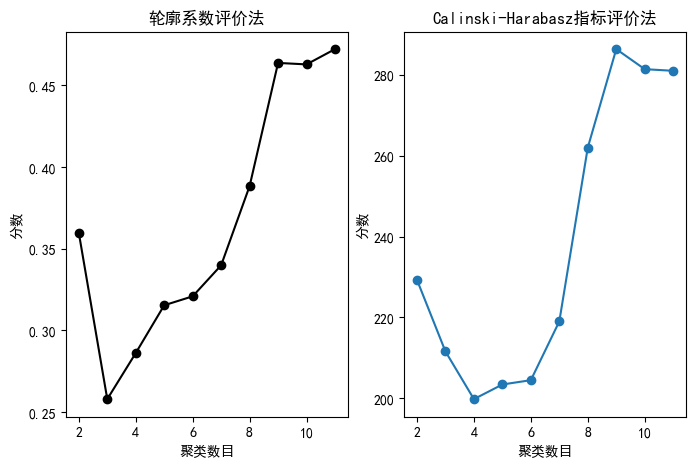

<function matplotlib.pyplot.close(fig=None)>

In [53]:
# 绘制折线图   
plt.figure(figsize=(8, 5))
plt.rcParams['font.sans-serif'] = 'SimHei'  # 显示中文
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1, 2, 1)  # 子图
plt.plot(range(2, 12),silhouettteScore3, 'ko-', linewidth=1.5)
plt.title('轮廓系数评价法')
plt.xlabel('聚类数目')
plt.ylabel('分数')
plt.subplot(1,2,2)  
plt.plot(range(2, 12), calinskiharabazScore3, 'o-', linewidth=1.5)
plt.title('Calinski-Harabasz指标评价法')
plt.xlabel('聚类数目')
plt.ylabel('分数')
plt.savefig('tmp/policy_holder_ysqz.jpg') 
plt.show()
plt.close
#如图所示，聚类数从2到3时和从9到10、10到11时模型性能相对下降较明显。
#Silhouette 分数在聚类数为2到11时都表现得相对较好，逐渐增加。这可能表示不同聚类数下，数据点之间的相似性和簇的分离度都在一定程度上得到了保持。
# 但从数据看，聚类数为8时，Silhouette 分数达到了一个较高的值，而聚类数进一步增加到9和10时，Silhouette 分数也有轻微提高。
# 考虑到轮廓系数的含义，通常更高的值表示更好的聚类效果。因此，可以初步认为在聚类数为8时，模型性能较好。
# 增加聚类数可能导致轻微的改善，但也可能增加模型的复杂性和理解的困难度
#聚类数的选择还应该考虑：
# 1. **计算复杂度：** 增加聚类数会导致算法需要计算更多的簇中心和分配数据点到相应簇的任务。一些聚类算法在处理大量簇时可能会增加计算的复杂性。
# 2. **可解释性：** 随着簇的增加，理解和解释每个簇的特性变得更加复杂。这可能需要更多的工作来解释模型中每个簇所代表的数据模式。
# 3. **业务解释：** 在业务层面，理解和解释更多的簇可能需要更多的时间和努力，因为每个簇的含义和业务影响可能需要更深入的分析。

In [54]:
#医疗机构聚类性能评价
silhouettteScore4 = []  # 轮廓系数
calinskiharabazScore4 = []  # Calinski-Harabasz
for i in range(2, 12):
    kmeans_num41 = KMeans(n_clusters = i, random_state=0).fit(
            claim_provider.iloc[:, 2:10])  # 构建并训练模型
    score = silhouette_score(
            claim_provider.iloc[:, 2:10], kmeans_num41.labels_)
    silhouettteScore4.append(score)
    print('数据聚%d类silhouette_score指数为：%f'%(i,score))
    score1 = calinski_harabasz_score(claim_provider.iloc[:, 2:10],
                                    kmeans_num41.labels_)
    calinskiharabazScore4.append(score1)
    print('数据聚%d类calinski_harabaz指数为：%f'%(i,score1))

数据聚2类silhouette_score指数为：0.570202
数据聚2类calinski_harabaz指数为：597.293164
数据聚3类silhouette_score指数为：0.469934
数据聚3类calinski_harabaz指数为：559.953997
数据聚4类silhouette_score指数为：0.274142
数据聚4类calinski_harabaz指数为：544.305672
数据聚5类silhouette_score指数为：0.353228
数据聚5类calinski_harabaz指数为：591.831518
数据聚6类silhouette_score指数为：0.341980
数据聚6类calinski_harabaz指数为：555.334254
数据聚7类silhouette_score指数为：0.360338
数据聚7类calinski_harabaz指数为：531.943203
数据聚8类silhouette_score指数为：0.358691
数据聚8类calinski_harabaz指数为：519.737460
数据聚9类silhouette_score指数为：0.358764
数据聚9类calinski_harabaz指数为：511.988053
数据聚10类silhouette_score指数为：0.369612
数据聚10类calinski_harabaz指数为：510.753059
数据聚11类silhouette_score指数为：0.374992
数据聚11类calinski_harabaz指数为：498.970459


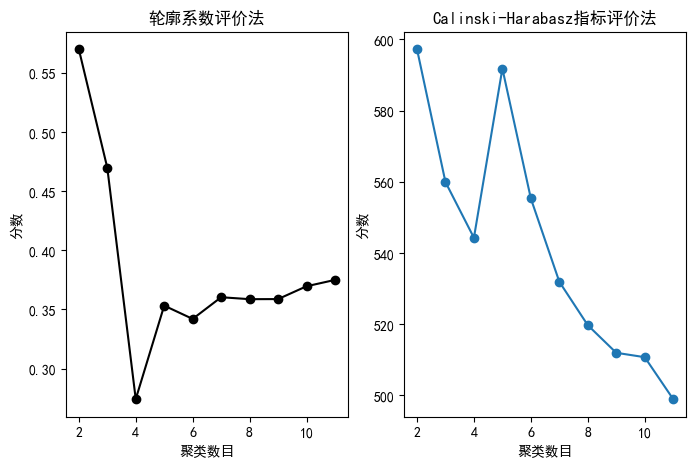

<function matplotlib.pyplot.close(fig=None)>

In [55]:
# 绘制折线图
plt.figure(figsize=(8, 5))
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
plt.subplot(1,2,1)  # 子图
plt.plot(range(2,12),silhouettteScore4, 'ko-', linewidth=1.5)
plt.title('轮廓系数评价法')
plt.xlabel('聚类数目')
plt.ylabel('分数')
plt.subplot(1, 2, 2)  
plt.plot(range(2, 12), calinskiharabazScore4, 'o-', linewidth=1.5)
plt.title('Calinski-Harabasz指标评价法')
plt.xlabel('聚类数目')
plt.ylabel('分数')
plt.savefig('tmp/Provider_ysqz_evaluate.jpg')
plt.show()
plt.close
# 1. **聚类数为2时：Silhouette 分数和 Calinski-Harabasz 分数都相对较高，这可能表示在2个聚类中，数据点内部相似度高，而簇之间的分离度也明显。
# 2. **聚类数为3时：Silhouette 分数和 Calinski-Harabasz 分数仍然较高，显示了较好的聚类效果。相对于2个聚类，增加到3个聚类，模型性能似乎有提升。
# 3. **聚类数超过5时：随着聚类数的增加，Silhouette 和 Calinski-Harabasz 分数逐渐下降。这可能表示在超过5个聚类时，模型性能有所减弱。
# 1. **Calinski-Harabasz 指数在聚类数为5时，Calinski-Harabasz 分数较高，表明模型整体上在簇内部更紧凑，簇间分离性较好。
# 2. **Silhouette 分数在聚类数为5时也相对较高，显示了较好的聚类效果。虽然比聚类数为3时稍低，但仍然维持在一个相对较好的水平。
# 3. **业务解释性： 聚类数为5时可能带有更多的细节，更复杂，因此在解释性方面可能相对较高。聚类数为3时模型更简单，可能更容易解释。
# 综合考虑这些因素，如果模型的复杂性可以被接受，并且业务需求需要更详细的聚类，那么聚类数为5可能是一个很好的选择。
# 但如果业务解释性和模型的简洁性对你更为重要，那么聚类数为3也可能是个合适的选择。